# Lektion 6 - 2025-09-10

### Datavisualisering med Matplotlib, Seaborn

Importera libraries med alias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Dokumentation:
- https://matplotlib.org/stable/api/index.html
- https://seaborn.pydata.org/api.html

Cheat Sheet:
- https://matplotlib.org/cheatsheets/

Skapa en variabel för den relativa sökvägen till csv filen

In [1]:
data = "C:/VScode projects/Lektion1/employees.csv"

Läs in csv filen till ett Pandas DataFrame

In [2]:
schema = {
    "First Name": {"dtype": "string"},
    "Start Date": {"dtype": "datetime64[ns]"},
    "Last Login Time": {"dtype": "string"},
    "Salary": {"dtype": "Int64"},
    "Bonus %": {"dtype": "float"},
    "Senior Management":{"dtype": "boolean"},
    "Team": {"dtype": "string"},
}

rename_map = {
    "First Name": "first_name",
    "Start Date": "start_date",
    "Last Login Time": "last_login_time",
    "Salary": "salary_usd",
    "Bonus %": "bonus_pct",
    "Senior Management": "senior_management",
    "Team": "team",
}

In [5]:
def apply_schema(df: pd.DataFrame, schema: dict, rename_map: dict) -> pd.DataFrame:
    # datatypes
    for col, datatype in schema.items():
        if col not in df.columns:
            continue

        dtype = datatype.get("dtype", None)
        if dtype and "datetime" in dtype:
            df[col] = pd.to_datetime(df[col], format="%m/%d/%Y", errors="coerce")
        elif dtype:
            df[col] = df[col].astype(dtype, errors="ignore")

    # rename
    if rename_map:
        df = df.rename(columns=rename_map)
    return df

In [6]:
df = pd.read_csv(data)

In [7]:
df = apply_schema(df, schema, rename_map)

#### Matplotlib
- Ger full kontroll över alla detaljer i en visualisering
- Grundläggande: både Pandas och Seaborn bygger på Matplotlib under huven
- Kräver lite mer kod för att skapa grafer jämfört med Pandas och Seaborn

#### Seaborn
- Väldigt enkelt att skapa snygga standardvisualiseringar med lite kod
- Matplotlib är underliggande motorn, går inte att använda Seaborn utan Matplotlib
- Lättare att skapa visualiseringar med mer avancerad statistik

Theme och styling med Seaborn

Valmöjligheter för **palette**: deep, muted, pastel, bright, dark, colorblind

https://seaborn.pydata.org/tutorial/color_palettes.html

In [8]:
sns.set_theme(style="white", palette="colorblind")
plt.rcParams["figure.figsize"] = (6, 4) # global inställning visualiseringsstorlek

Denna kod går att köra för att se nuvarande **palette**

In [9]:
sns.color_palette()

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

Testa inställningarna för stylingen med några färdiga visualisering

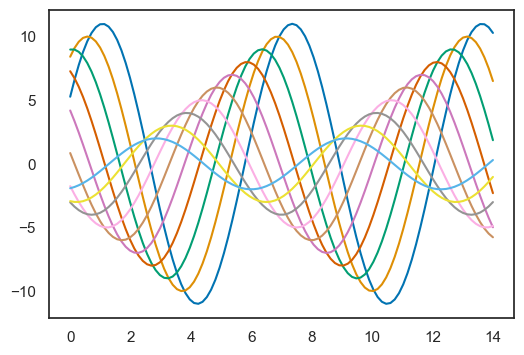

In [10]:
x = np.linspace(0, 14, 100)
for i in range(1, 10 + 1):
    plt.plot(x, np.sin(x + i * .5) * (10 + 2 - i) * 1)

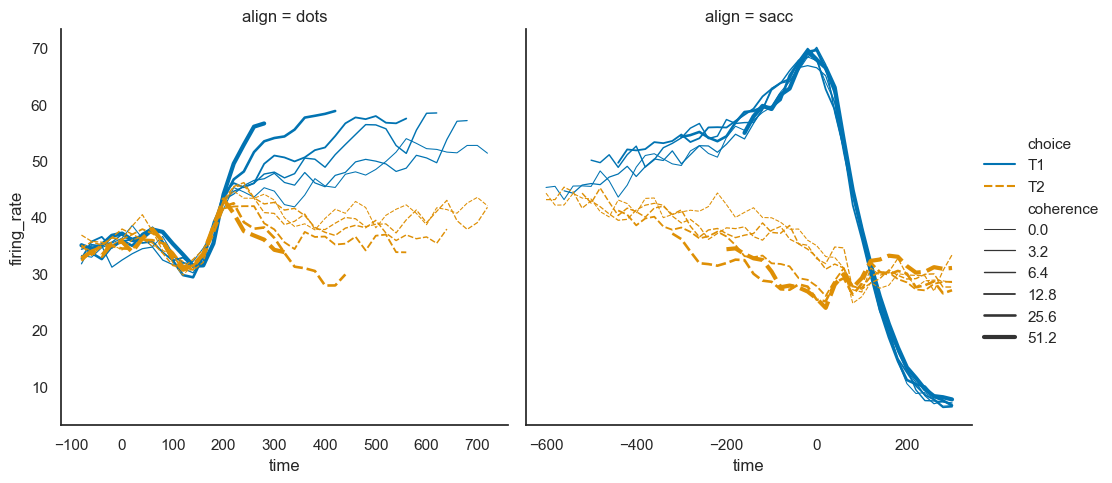

In [11]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

Histogram - Matplotlib

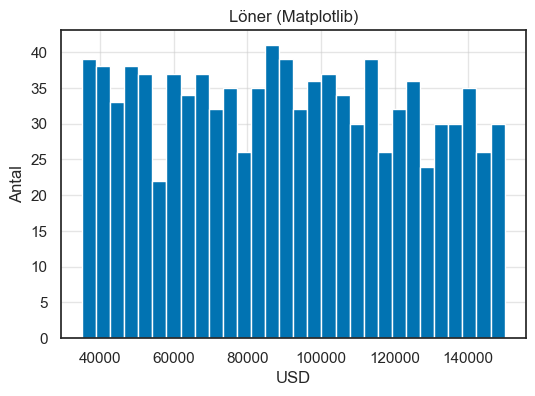

In [12]:
plt.hist(df["salary_usd"], bins=30)
plt.title("Löner (Matplotlib)")
plt.xlabel("USD")
plt.ylabel("Antal")
plt.grid(alpha=0.5)
plt.show()

Seaborn - Histogram med KDE

KDE = Kernel Density Estimate (en modell som visar den underliggadne fördelningen)

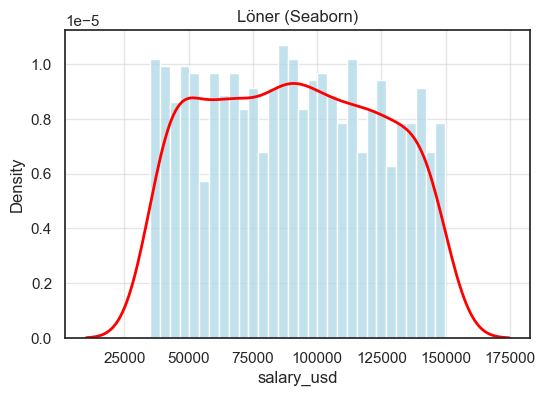

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rita histogram
sns.histplot(df, x="salary_usd", bins=30, color="lightblue", stat="density")

# Rita KDE separat med egen färg
sns.kdeplot(df["salary_usd"], color="red", linewidth=2)

plt.title("Löner (Seaborn)")
plt.grid(alpha=0.5)
plt.show()


Seaborn - KDE Plot separat

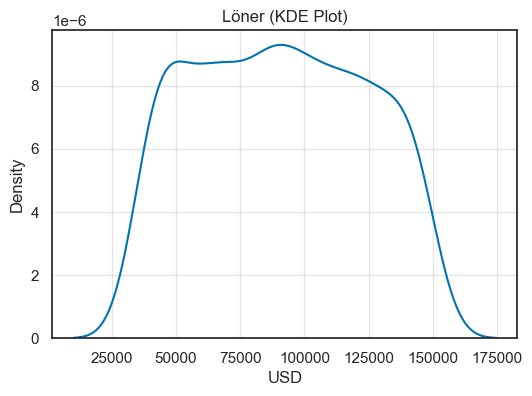

In [24]:
sns.kdeplot(df["salary_usd"])
plt.title("Löner (KDE Plot)")
plt.xlabel("USD")
plt.grid(alpha=0.5)
plt.show()

Seaborn - Boxplot

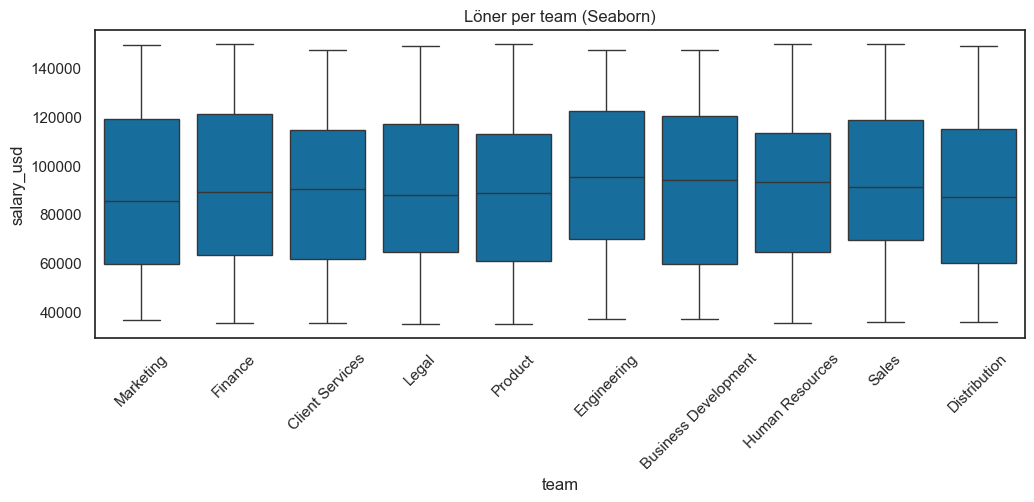

In [25]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x="team", y="salary_usd")
plt.title("Löner per team (Seaborn)")
plt.xticks(rotation=45)

plt.show()

Exempel: Lägg in text/beskrivning i visualiseringar

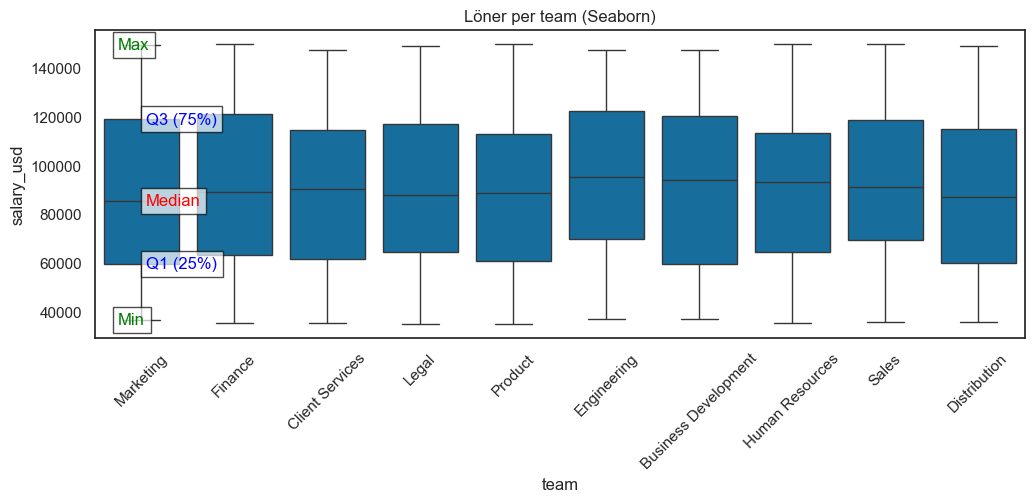

In [27]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(data=df, x="team", y="salary_usd")
plt.title("Löner per team (Seaborn)")
plt.xticks(rotation=45)

# Beräkna sammanfattning för första teamet
team = df["team"].unique()[0]
subset = df[df["team"] == team]["salary_usd"]

q1 = subset.quantile(0.25)
median = subset.median()
q3 = subset.quantile(0.75)
min_val = subset.min()
max_val = subset.max()

# Definiera en liten stil för rutorna
label_style = dict(facecolor="white", edgecolor="black", alpha=0.7)

# Annoteringar
plt.text(x=0.05, y=median, s="Median", color="red", va="center", bbox=label_style)
plt.text(x=0.05, y=q1, s="Q1 (25%)", color="blue", va="center", bbox=label_style)
plt.text(x=0.05, y=q3, s="Q3 (75%)", color="blue", va="center", bbox=label_style)
plt.text(x=-0.25, y=min_val, s="Min", color="green", va="center", bbox=label_style)
plt.text(x=-0.25, y=max_val, s="Max", color="green", va="center", bbox=label_style)

plt.show()

Seaborn - Scatterplot med en regressionslinje

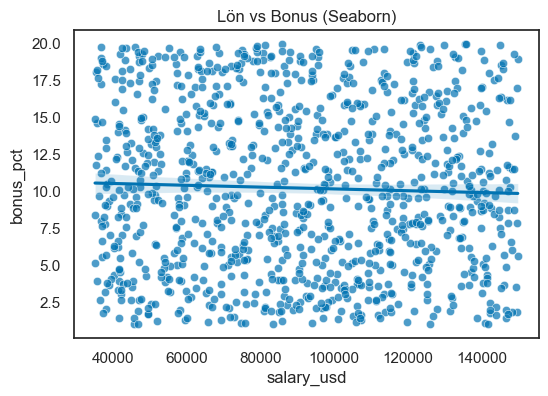

In [28]:
sns.scatterplot(data=df, x="salary_usd", y="bonus_pct", alpha=0.7)
sns.regplot(data=df, x="salary_usd", y="bonus_pct", scatter=False)
plt.title("Lön vs Bonus (Seaborn)")
plt.show()

Genererad data med NumPy

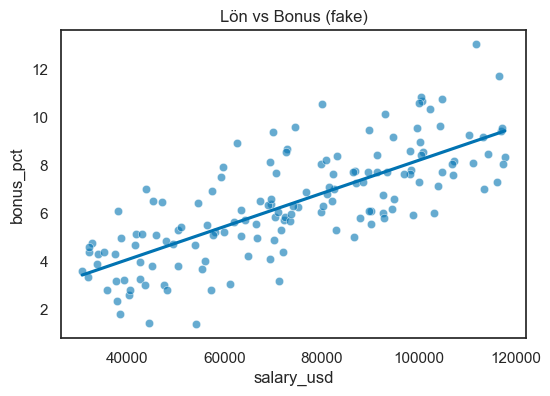

In [29]:
rng = np.random.default_rng(42)
x = rng.uniform(30_000, 120_000, 150)
y = 2 + 0.00006 * x + rng.normal(0, 1.5, len(x))

fake_df = pd.DataFrame({"salary_usd": x, "bonus_pct": y})

sns.scatterplot(data=fake_df, x="salary_usd", y="bonus_pct", alpha=0.6)
sns.regplot(data=fake_df, x="salary_usd", y="bonus_pct", scatter=False, ci=None)
plt.title("Lön vs Bonus (fake)")
plt.show()

Seaborn - Horisontellt stapeldiagram

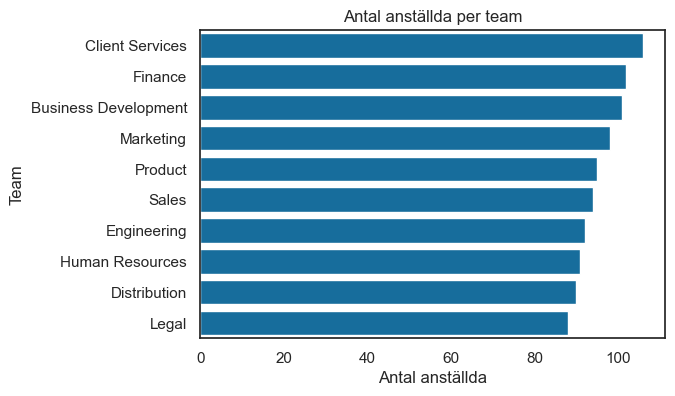

In [30]:
sns.countplot(data=df, y="team", order=df["team"].value_counts(ascending=False).index)
plt.title("Antal anställda per team")
plt.xlabel("Antal anställda")
plt.ylabel("Team")
plt.show()

Matplotlib - Linechart

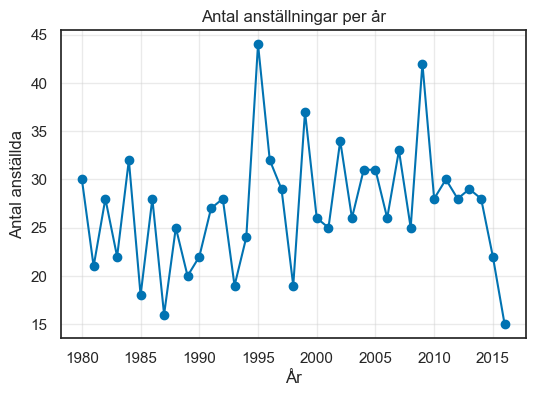

In [31]:
# Räkna antal anställningar per år
hiring_per_year = df["start_date"].dt.year.value_counts().sort_index()

plt.plot(hiring_per_year.index, hiring_per_year.values, marker="o")
plt.title("Antal anställningar per år")
plt.xlabel("År")
plt.ylabel("Antal anställda")
plt.grid(alpha=0.4)
plt.show()

### Bonus

Plotly - interaktiva visualiseringar

`pip install plotly`

`pip install nbformat`

`pip install yfinance`

In [42]:
import sys

# Installera nbformat
!{sys.executable} -m pip install plotly





  Using cached plotly-6.3.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.4.0-py3-none-any.whl.metadata (11 kB)
Using cached plotly-6.3.0-py3-none-any.whl (9.8 MB)
Using cached narwhals-2.4.0-py3-none-any.whl (406 kB)

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [43]:
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

Hämta aktiedata med Yahoo Finance biblioteket

Visualisera interaktivt med Plotly

In [44]:
tickers = ["NVDA", "AMD"]

In [45]:
prices = yf.download(tickers, period="10y", auto_adjust=True)["Close"].dropna()
cumulative_ret = prices / prices.iloc[0] - 1

fig = px.line(cumulative_ret, title="NVDA vs AMD - kumulativ avkastning (10 år)", labels={"value":"Avkastning", "index":"Datum", "variable":"Ticker"})
fig.show()

[*********************100%***********************]  2 of 2 completed


In [46]:
buy_date = cumulative_ret.index[1500]
sell_date = cumulative_ret.index[2000]

fig = px.line(
    cumulative_ret["NVDA"],
    title="NVDA - kumulativ avkastning (10 år)",
    labels={"value": "Avkastning", "index": "Datum", "variable": "Ticker"}
)

fig.add_scatter(
    x=[buy_date],
    y=[cumulative_ret.loc[buy_date, "NVDA"]],
    mode="markers+text",
    marker=dict(color="green", size=12, symbol="triangle-up"),
    text=["Jonathan köpte"],
    textposition="top center",
    name="Jonathan köpte",
    textfont=dict(color="black", size=14),
    fillcolor="white"
)

fig.add_scatter(
    x=[sell_date],
    y=[cumulative_ret.loc[sell_date, "NVDA"]],
    mode="markers+text",
    marker=dict(color="red", size=12, symbol="triangle-down"),
    text=["Jonathan sålde"],
    textposition="bottom center",
    name="Jonathan sålde",
    textfont=dict(color="black", size=14),
    fillcolor="white"
)

fig.show()

In [47]:
g = df.groupby("team", as_index=False)["salary_usd"].agg(mean="mean", median="median").sort_values("mean")
fig = px.bar(g, y="team", x="mean", orientation="h", text_auto=".0f", title="Lön per team")
fig.update_traces(hovertemplate="%{y}<br>Lön: %{x:,.0f} USD")

fig.update_layout(
    updatemenus=[dict(type="buttons", direction="right", x=1, y=1.15, buttons=[
        dict(label="Medel",  method="update", args=[{"x":[g["mean"]]},  {"xaxis":{"title":"Medellön (USD)"}}]),
        dict(label="Median", method="update", args=[{"x":[g["median"]]},{"xaxis":{"title":"Medianlön (USD)"}}]),
    ])]
)
fig.show()